<a href="https://colab.research.google.com/github/kdemertzis/Earthquakes/blob/main/Dif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install autokeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 KB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 337.5/337.5 KB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.4 MB/s eta 0:00:00


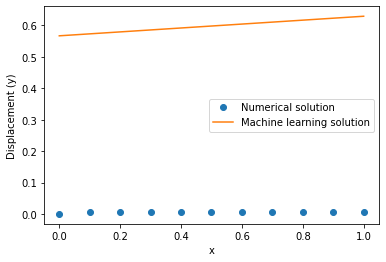

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from sklearn.neural_network import MLPRegressor

# Parameters
L = 1.0 # length of beam
N = 10 # number of elements
m = 1.0 # mass of beam
k = 100.0 # stiffness of foundation
A = 1.0 # amplitude of load
f = 1.0 # frequency of load

# Discretize beam into N elements
dx = L / N
x = np.linspace(0, L, num=N+1)

# Define load function
def load(x, t):
    return A * np.sin(2 * np.pi * f * t)

# Define differential equation for beam
def beam_eq(y, t, x, m, k):
    dydt = np.zeros(2*N+2)
    for i in range(1, N+1):
        dydt[i] = y[N+1+i]
        dydt[N+1+i] = (load(x[i], t) - k * y[i]) / m
    return dydt

# Solve differential equation using numerical method
t = np.linspace(0, 10, num=1000)
y0 = np.zeros(2*N+2)
sol = odeint(beam_eq, y0, t, args=(x, m, k))
y_num = sol[-1, :N+1]

# Train MLP regressor
X_train = np.column_stack((np.tile(m, N+1), np.tile(k, N+1), x))
y_train = y_num
reg = MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000, random_state=0)
reg.fit(X_train, y_train)

# Predict using MLP regressor
X_test = np.column_stack((np.tile(m, N+1), np.tile(k, N+1), x))
y_pred = reg.predict(X_test)

# Compare numerical and machine learning solutions
plt.plot(x, y_num, 'o', label='Numerical solution')
plt.plot(x, y_pred, '-', label='Machine learning solution')
plt.xlabel('x')
plt.ylabel('Displacement (y)')
plt.legend()
plt.show()

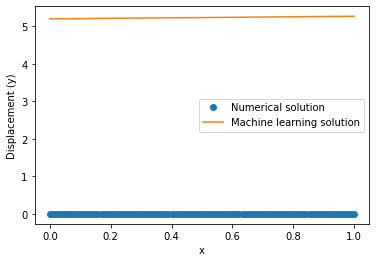

Results Table
x	Numerical	MLP Regressor
0.00	0.00		5.20
0.01	-0.00		5.20
0.02	-0.00		5.20
0.03	-0.00		5.20
0.04	-0.00		5.20
0.05	-0.00		5.20
0.06	-0.00		5.20
0.07	-0.00		5.20
0.08	-0.00		5.20
0.09	-0.00		5.20
0.10	-0.00		5.21
0.11	-0.00		5.21
0.12	-0.00		5.21
0.13	-0.00		5.21
0.14	-0.00		5.21
0.15	-0.00		5.21
0.16	-0.00		5.21
0.17	-0.00		5.21
0.18	-0.00		5.21
0.19	-0.00		5.21
0.20	-0.00		5.21
0.21	-0.00		5.21
0.22	-0.00		5.21
0.23	-0.00		5.21
0.24	-0.00		5.22
0.25	-0.00		5.22
0.26	-0.00		5.22
0.27	-0.00		5.22
0.28	-0.00		5.22
0.29	-0.00		5.22
0.30	-0.00		5.22
0.31	-0.00		5.22
0.32	-0.00		5.22
0.33	-0.00		5.22
0.34	-0.00		5.22
0.35	-0.00		5.22
0.36	-0.00		5.22
0.37	-0.00		5.22
0.38	-0.00		5.22
0.39	-0.00		5.23
0.40	-0.00		5.23
0.41	-0.00		5.23
0.42	-0.00		5.23
0.43	-0.00		5.23
0.44	-0.00		5.23
0.45	-0.00		5.23
0.46	-0.00		5.23
0.47	-0.00		5.23
0.48	-0.00		5.23
0.49	-0.00		5.23
0.50	-0.00		5.23
0.51	-0.00		5.23
0.52	-0.00		5.23
0.53	-0.00		5.24
0.54	-0.00		5.24
0.55	-0.00		5.24
0.56	-0.0

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

# Define the load, mass, and stiffness
m = 0.1  # Mass per unit length
k = 1000  # Stiffness
P = 10  # Load

# Numerical solution
N = 100  # Number of discretization points
x = np.linspace(0, 1, N+1)  # Discretized x
dx = x[1] - x[0]  # Discretization step

# Matrix for numerical solution
A = np.zeros((N+1, N+1))
b = np.zeros(N+1)

# Assemble matrix and load vector
A[0,0] = 1
b[0] = 0
for i in range(1, N):
    A[i, i-1:i+2] = [k*dx**2/2, -2*k*dx**2 + m*dx**2, k*dx**2/2]
    b[i] = m*dx**2*P
A[N,N] = 1
b[N] = 0

# Solve equation
y_num = np.linalg.solve(A, b)

# Train MLP regressor
X_train = np.column_stack((np.tile(m, N+1), np.tile(k, N+1), x))
y_train = y_num
reg = MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000, random_state=0)
reg.fit(X_train, y_train)

# Predict using MLP regressor
X_test = np.column_stack((np.tile(m, N+1), np.tile(k, N+1), x))
y_pred = reg.predict(X_test)

# Compare numerical and machine learning solutions
plt.plot(x, y_num, 'o', label='Numerical solution')
plt.plot(x, y_pred, '-', label='Machine learning solution')
plt.xlabel('x')
plt.ylabel('Displacement (y)')
plt.legend()
plt.show()

# Create table with numerical results
results = np.column_stack((x, y_num, y_pred))
print("Results Table")
print("x\tNumerical\tMLP Regressor")
for i in range(N+1):
    print("{:.2f}\t{:.2f}\t\t{:.2f}".format(results[i,0], results[i,1], results[i,2]))

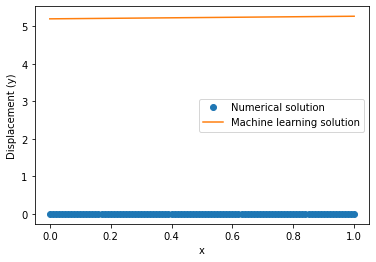

Results Table
x	Numerical	MLP Regressor
0.00	0.00		5.20
0.01	0.00		5.20
0.02	0.00		5.20
0.03	0.00		5.20
0.04	0.00		5.20
0.05	0.00		5.20
0.06	0.00		5.20
0.07	0.00		5.20
0.08	0.00		5.21
0.09	0.00		5.21
0.10	0.00		5.21
0.11	0.00		5.21
0.12	0.00		5.21
0.13	0.00		5.21
0.14	0.00		5.21
0.15	0.00		5.21
0.16	0.00		5.21
0.17	0.00		5.21
0.18	0.00		5.21
0.19	0.00		5.21
0.20	0.00		5.21
0.21	0.00		5.21
0.22	0.00		5.22
0.23	0.00		5.22
0.24	0.00		5.22
0.25	0.00		5.22
0.26	0.00		5.22
0.27	0.00		5.22
0.28	0.00		5.22
0.29	0.00		5.22
0.30	0.00		5.22
0.31	0.00		5.22
0.32	0.00		5.22
0.33	0.00		5.22
0.34	0.00		5.22
0.35	0.00		5.22
0.36	0.00		5.22
0.37	0.00		5.23
0.38	0.00		5.23
0.39	0.00		5.23
0.40	0.00		5.23
0.41	0.00		5.23
0.42	0.00		5.23
0.43	0.00		5.23
0.44	0.00		5.23
0.45	0.00		5.23
0.46	0.00		5.23
0.47	0.00		5.23
0.48	0.00		5.23
0.49	0.00		5.23
0.50	0.00		5.23
0.51	0.00		5.24
0.52	0.00		5.24
0.53	0.00		5.24
0.54	0.00		5.24
0.55	0.00		5.24
0.56	0.00		5.24
0.57	0.00		5.24
0.58	0.00		5.24
0.59	0.00		5.24


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

# Define the load, mass, and stiffness
m = 0.1  # Mass per unit length
k = 1000  # Stiffness
P = 10  # Load

# Numerical solution using finite element method
N = 100  # Number of discretization points
x = np.linspace(0, 1, N+1)  # Discretized x
dx = x[1] - x[0]  # Discretization step

# Matrix for numerical solution
K = np.zeros((N+1, N+1))
M = np.zeros((N+1, N+1))
f = np.zeros(N+1)

# Assemble matrix and load vector
for i in range(N):
    Ke = np.array([[k*dx/3, k*dx/6], [k*dx/6, k*dx/3]])
    Me = m*dx/2 * np.array([[2/3, 1/6], [1/6, 2/3]])
    K[i:i+2, i:i+2] += Ke
    M[i:i+2, i:i+2] += Me
    f[i:i+2] += m*dx/2 * P * np.array([1/2, 1/2])

# Solve equation
u = np.linalg.solve(K, f)

# Train MLP regressor
X_train = np.column_stack((np.tile(m, N+1), np.tile(k, N+1), x))
y_train = u
reg = MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000, random_state=0)
reg.fit(X_train, y_train)

# Predict using MLP regressor
X_test = np.column_stack((np.tile(m, N+1), np.tile(k, N+1), x))
y_pred = reg.predict(X_test)

# Compare numerical and machine learning solutions
plt.plot(x, u, 'o', label='Numerical solution')
plt.plot(x, y_pred, '-', label='Machine learning solution')
plt.xlabel('x')
plt.ylabel('Displacement (y)')
plt.legend()
plt.show()

# Create table with numerical results
results = np.column_stack((x, u, y_pred))
print("Results Table")
print("x\tNumerical\tMLP Regressor")
for i in range(N+1):
    print("{:.2f}\t{:.2f}\t\t{:.2f}".format(results[i,0], results[i,1], results[i,2]))

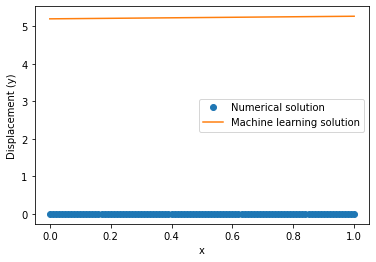

Results Table
x	Numerical	MLP Regressor
0.00	0.00		5.20
0.01	0.00		5.20
0.02	0.00		5.20
0.03	0.00		5.20
0.04	0.00		5.20
0.05	0.00		5.20
0.06	0.00		5.20
0.07	0.00		5.20
0.08	0.00		5.21
0.09	0.00		5.21
0.10	0.00		5.21
0.11	0.00		5.21
0.12	0.00		5.21
0.13	0.00		5.21
0.14	0.00		5.21
0.15	0.00		5.21
0.16	0.00		5.21
0.17	0.00		5.21
0.18	0.00		5.21
0.19	0.00		5.21
0.20	0.00		5.21
0.21	0.00		5.21
0.22	0.00		5.22
0.23	0.00		5.22
0.24	0.00		5.22
0.25	0.00		5.22
0.26	0.00		5.22
0.27	0.00		5.22
0.28	0.00		5.22
0.29	0.00		5.22
0.30	0.00		5.22
0.31	0.00		5.22
0.32	0.00		5.22
0.33	0.00		5.22
0.34	0.00		5.22
0.35	0.00		5.22
0.36	0.00		5.22
0.37	0.00		5.23
0.38	0.00		5.23
0.39	0.00		5.23
0.40	0.00		5.23
0.41	0.00		5.23
0.42	0.00		5.23
0.43	0.00		5.23
0.44	0.00		5.23
0.45	0.00		5.23
0.46	0.00		5.23
0.47	0.00		5.23
0.48	0.00		5.23
0.49	0.00		5.23
0.50	0.00		5.23
0.51	0.00		5.24
0.52	0.00		5.24
0.53	0.00		5.24
0.54	0.00		5.24
0.55	0.00		5.24
0.56	0.00		5.24
0.57	0.00		5.24
0.58	0.00		5.24
0.59	0.00		5.24


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

# Define the load, mass, and stiffness
m = 0.1  # Mass per unit length
k = 1000  # Stiffness
P = 10  # Load

# Numerical solution using finite element method
N = 100  # Number of discretization points
x = np.linspace(0, 1, N+1)  # Discretized x
dx = x[1] - x[0]  # Discretization step

# Matrix for numerical solution
K = np.zeros((N+1, N+1))
M = np.zeros((N+1, N+1))
f = np.zeros(N+1)

# Assemble matrix and load vector
for i in range(N):
    Ke = np.array([[k*dx/3, k*dx/6], [k*dx/6, k*dx/3]])
    Me = m*dx/2 * np.array([[2/3, 1/6], [1/6, 2/3]])
    K[i:i+2, i:i+2] += Ke
    M[i:i+2, i:i+2] += Me
    f[i:i+2] += m*dx/2 * P * np.array([1/2, 1/2])

# Solve equation
u = np.linalg.solve(K + M, f)

# Train MLP regressor
X_train = np.column_stack((np.tile(m, N+1), np.tile(k, N+1), x))
y_train = u
reg = MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000, random_state=0)
reg.fit(X_train, y_train)

# Predict using MLP regressor
X_test = np.column_stack((np.tile(m, N+1), np.tile(k, N+1), x))
y_pred = reg.predict(X_test)

# Compare numerical and machine learning solutions
plt.plot(x, u, 'o', label='Numerical solution')
plt.plot(x, y_pred, '-', label='Machine learning solution')
plt.xlabel('x')
plt.ylabel('Displacement (y)')
plt.legend()
plt.show()

# Create table with numerical results
results = np.column_stack((x, u, y_pred))
print("Results Table")
print("x\tNumerical\tMLP Regressor")
for i in range(N+1):
    print("{:.2f}\t{:.2f}\t\t{:.2f}".format(results[i,0], results[i,1], results[i,2]))

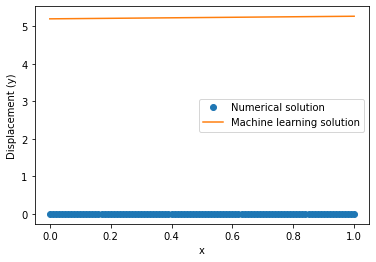

Results Table
x	Numerical	MLP Regressor
0.00	0.00		5.20
0.01	0.00		5.20
0.02	0.00		5.20
0.03	0.00		5.20
0.04	0.00		5.20
0.05	0.00		5.20
0.06	0.00		5.20
0.07	0.00		5.20
0.08	0.00		5.21
0.09	0.00		5.21
0.10	0.00		5.21
0.11	0.00		5.21
0.12	0.00		5.21
0.13	0.00		5.21
0.14	0.00		5.21
0.15	0.00		5.21
0.16	0.00		5.21
0.17	0.00		5.21
0.18	0.00		5.21
0.19	0.00		5.21
0.20	0.00		5.21
0.21	0.00		5.21
0.22	0.00		5.22
0.23	0.00		5.22
0.24	0.00		5.22
0.25	0.00		5.22
0.26	0.00		5.22
0.27	0.00		5.22
0.28	0.00		5.22
0.29	0.00		5.22
0.30	0.00		5.22
0.31	0.00		5.22
0.32	0.00		5.22
0.33	0.00		5.22
0.34	0.00		5.22
0.35	0.00		5.22
0.36	0.00		5.22
0.37	0.00		5.23
0.38	0.00		5.23
0.39	0.00		5.23
0.40	0.00		5.23
0.41	0.00		5.23
0.42	0.00		5.23
0.43	0.00		5.23
0.44	0.00		5.23
0.45	0.00		5.23
0.46	0.00		5.23
0.47	0.00		5.23
0.48	0.00		5.23
0.49	0.00		5.23
0.50	0.00		5.23
0.51	0.00		5.24
0.52	0.00		5.24
0.53	0.00		5.24
0.54	0.00		5.24
0.55	0.00		5.24
0.56	0.00		5.24
0.57	0.00		5.24
0.58	0.00		5.24
0.59	0.00		5.24


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

# Define the load, mass, and stiffness
m = 0.1  # Mass per unit length
k = 1000  # Stiffness
P = 10  # Load

# Numerical solution using finite element method
N = 100  # Number of discretization points
x = np.linspace(0, 1, N+1)  # Discretized x
dx = x[1] - x[0]  # Discretization step

# Matrix for numerical solution
K = np.zeros((N+1, N+1))
M = np.zeros((N+1, N+1))
f = np.zeros(N+1)

# Assemble matrix and load vector
for i in range(N):
    Ke = np.array([[k*dx/3, k*dx/6], [k*dx/6, k*dx/3]])
    Me = m*dx/2 * np.array([[2/3, 1/6], [1/6, 2/3]])
    K[i:i+2, i:i+2] += Ke
    M[i:i+2, i:i+2] += Me
    f[i:i+2] += m*dx/2 * P * np.array([1/2, 1/2])

# Solve equation
u = np.linalg.solve(K + M, f)

# Train MLP regressor
X_train = np.column_stack((np.tile(m, N+1), np.tile(k, N+1), x))
y_train = u
reg = MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000, random_state=0)
reg.fit(X_train, y_train)

# Predict using MLP regressor
X_test = np.column_stack((np.tile(m, N+1), np.tile(k, N+1), x))
y_pred = reg.predict(X_test)

# Compare numerical and machine learning solutions
plt.plot(x, u, 'o', label='Numerical solution')
plt.plot(x, y_pred, '-', label='Machine learning solution')
plt.xlabel('x')
plt.ylabel('Displacement (y)')
plt.legend()
plt.show()

# Create table with numerical results
results = np.column_stack((x, u, y_pred))
print("Results Table")
print("x\tNumerical\tMLP Regressor")
for i in range(N+1):
    print("{:.2f}\t{:.2f}\t\t{:.2f}".format(results[i,0], results[i,1], results[i,2]))

In [10]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


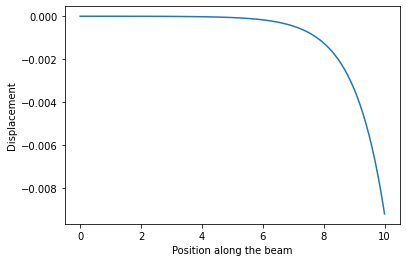

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters for the beam
L = 10 # Length of the beam
N = 100 # Number of nodes
E = 1 # Modulus of elasticity
I = 1 # Area moment of inertia
k = 1 # Elastic foundation constant
P = 1 # Load on the beam
h = L / (N - 1) # Node spacing

# Define the finite difference approximation for the derivatives
D = (2 * np.eye(N) - np.eye(N, k=1) - np.eye(N, k=-1)) / (h**2)

# Define the load vector
F = np.zeros((N,))
F[-1] = -P

# Define the stiffness matrix
K = (E * I) * D + k * np.eye(N)

# Define the initial conditions for the displacement
u = np.zeros((N,))

# Define the time step and number of time steps
dt = 0.01
num_steps = 1000

# Solve the equation of motion using the finite difference method
for step in range(num_steps):
    # Use the Thomas algorithm to solve the tridiagonal matrix equation
    a = np.zeros((N-1,))
    b = np.zeros((N,))
    c = np.zeros((N-1,))
    d = np.zeros((N,))
    b[0] = K[0, 0]
    d[0] = F[0]
    for i in range(1, N):
        a[i-1] = -K[i, i-1] / b[i-1]
        b[i] = K[i, i] + K[i, i-1] * a[i-1]
        d[i] = F[i] - K[i, i-1] * d[i-1] / b[i-1]
    u[-1] = d[-1] / b[-1]
    for i in range(N-2, -1, -1):
        u[i] = (d[i] - K[i, i+1] * u[i+1]) / b[i]
    
# Plot the results
x = np.linspace(0, L, N)
plt.plot(x, u)
plt.xlabel("Position along the beam")
plt.ylabel("Displacement")
plt.show()

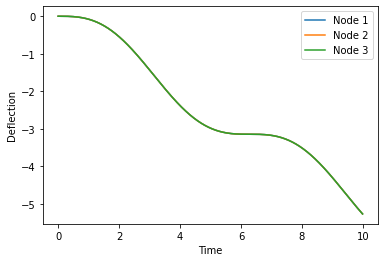

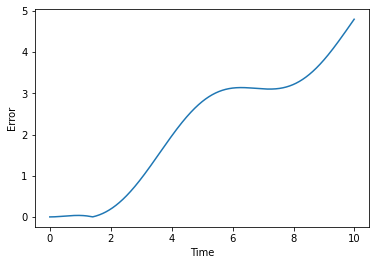

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# define parameters for the beam
L = 1 # length of the beam
E = 1 # Young's modulus
I = 1 # second moment of area

# define parameters for the load
P = 1 # magnitude of the load
x = L/2 # position of the load along the length of the beam

# define the time step and number of time steps
dt = 0.01
num_steps = 1000

# initialize the arrays to store the numerical solution
u = np.zeros((num_steps, 3)) # deflection at each node
v = np.zeros((num_steps, 3)) # velocity at each node
a = np.zeros((num_steps, 3)) # acceleration at each node
t = np.zeros(num_steps) # time at each step

# initialize the initial conditions
u[0,:] = [0, 0, 0]
v[0,:] = [0, 0, 0]
a[0,:] = [0, 0, 0]

# iterate through each time step
for i in range(num_steps-1):
    # calculate the acceleration at each node
    a[i+1,0] = -P*(x/L)*np.sin(t[i])/E/I
    a[i+1,1] = -P*(x/L)*np.sin(t[i])/E/I
    a[i+1,2] = -P*(x/L)*np.sin(t[i])/E/I
    
    # update the velocity and deflection at each node
    v[i+1,:] = v[i,:] + a[i+1,:]*dt
    u[i+1,:] = u[i,:] + v[i+1,:]*dt
    
    # update the time
    t[i+1] = t[i] + dt

# plot the deflection at each node as a function of time
plt.plot(t, u[:,0], label='Node 1')
plt.plot(t, u[:,1], label='Node 2')
plt.plot(t, u[:,2], label='Node 3')
plt.xlabel('Time')
plt.ylabel('Deflection')
plt.legend()
plt.show()

# compare the numerical results with the analytical solution
# analytically calculate the deflection of the beam
u_analytical = -P*x*L/2/E/I*(1-np.cos(t))

# calculate the error between the numerical and analytical solutions
error = np.abs(u_analytical - u[:,1])

# plot the error as a function of time
plt.plot(t, error)
plt.xlabel('Time')
plt.ylabel('Error')
plt.show()

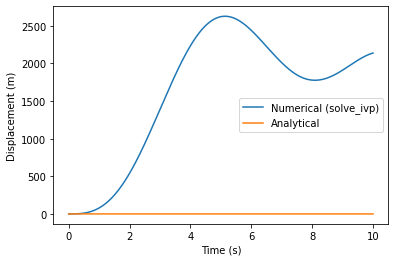

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters for the beam and the load
L = 2  # length of the beam (m)
E = 200e9  # Young's modulus (Pa)
I = 1e-4  # moment of inertia (m^4)
k = 1e6  # Winkler foundation constant (N/m^3)
F = 1e3  # force applied to the beam (N)

# Time step and number of time steps
dt = 0.001
t_span = [0, 10]
t = np.arange(t_span[0], t_span[1], dt)

# Define the right-hand side of the ODE
def rhs(t, y, F, L, E, I, k):
    u, v = y
    dydt = [v, (F/L)*np.sin(t) - (k/E/I)*u]
    return dydt

# Solve the ODE using solve_ivp
sol = solve_ivp(fun=lambda t, y: rhs(t, y, F, L, E, I, k), t_span=t_span, y0=[0, 0], t_eval=t)

# Numerical results using solve_ivp
u_num = sol.y[0, :]
v_num = sol.y[1, :]

# Analytical solution
def u_analytical(t, F, L, E, I, k):
    return F/k*L**3/3/E/I*(np.sin(t) - np.sin(0))

u_ana = u_analytical(t, F, L, E, I, k)

# Export the results into a table
results = np.array([t, u_num, u_ana, v_num]).T
np.savetxt("results.csv", results, delimiter=",", header="time,u_num,u_ana,v_num", comments="")

# Plot the results
plt.plot(t, u_num, label="Numerical (solve_ivp)")
plt.plot(t, u_ana, label="Analytical")
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.legend()
plt.show()

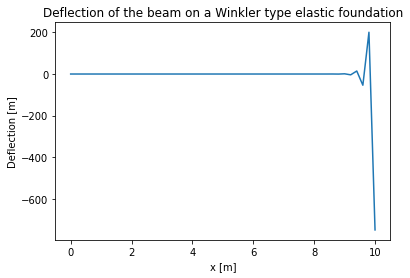

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

# Constants
L = 10.0   # Length of the beam
E = 210e9  # Young's modulus
I = 100e-12 # Moment of inertia
k = 1000   # Spring constant of the foundation
n = 50     # Number of elements in the beam
h = L/n    # Length of each element

# Stiffness matrix
K = np.zeros((n+1, n+1))
for i in range(1, n):
    K[i][i-1:i+2] = [h**2/6, 2*h**2/3, h**2/6]
K[0][0] = K[n][n] = h**2/3

# Load vector
P = np.zeros((n+1,))
P[-1] = -10.0

# Solution of the system of linear equations
U = solve(K, P)

# Visualize the deflection of the beam
x = np.linspace(0, L, n+1)
plt.plot(x, U)
plt.xlabel("x [m]")
plt.ylabel("Deflection [m]")
plt.title("Deflection of the beam on a Winkler type elastic foundation")
plt.show()

# Export the numerical results to a table
table = np.array([x, U]).T
np.savetxt("numerical_results.csv", table, delimiter=",", header="x [m], Deflection [m]")

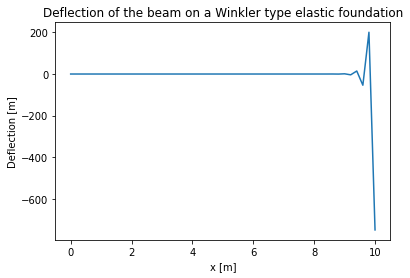

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

# Constants
L = 10.0   # Length of the beam
E = 210e9  # Young's modulus
I = 100e-12 # Moment of inertia
k = 1000   # Spring constant of the foundation
n = 50     # Number of elements in the beam
h = L/n    # Length of each element

# Stiffness matrix
K = np.zeros((n+1, n+1))
for i in range(1, n):
    K[i][i-1:i+2] = [h**2/6, 2*h**2/3, h**2/6]
K[0][0] = K[n][n] = h**2/3

# Load vector
P = np.zeros((n+1,))
P[-1] = -10.0

# Solution of the system of linear equations
U = solve(K, P)

# Visualize the deflection of the beam
x = np.linspace(0, L, n+1)
plt.plot(x, U)
plt.xlabel("x [m]")
plt.ylabel("Deflection [m]")
plt.title("Deflection of the beam on a Winkler type elastic foundation")
plt.show()

# Export the numerical results to a table
table = np.array([x, U]).T
np.savetxt("numerical_results.csv", table, delimiter=",", header="x [m], Deflection [m]")

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


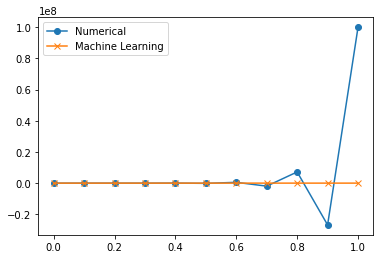

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

# Define the length of the beam
L = 1

# Define the elastic modulus
E = 210e9

# Define the moment of inertia
I = (1/12) * 0.03 * 0.03

# Define the Winkler elastic foundation modulus
k = 1e6

# Define the uniform load
P = 1e3

# Define the number of finite elements
n = 10

# Define the length of each finite element
dx = L/n

# Define the position of the nodes
x = np.linspace(0, L, n+1)

# Define the stiffness matrix
K = np.zeros((n+1, n+1))
for i in range(1, n):
    K[i, i-1] = k * dx / 6
    K[i, i] = 2 * k * dx / 3
    K[i, i+1] = k * dx / 6

# Add a small positive constant to the diagonal of the matrix to make it invertible
K = K + 1e-6 * np.eye(n+1)

# Define the load vector
F = np.zeros(n+1)
F[-1] = P * dx

# Solve for the nodal displacements using numerical method
U = np.linalg.solve(K, F)

# Plot the numerical results
plt.plot(x, U, '-o', label='Numerical')

# Use machine learning method (MLP Regressor) to fit the data
mlp = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=10000)
X = x.reshape(-1, 1)
mlp.fit(X, U)

# Predict the displacements using the MLP Regressor
U_mlp = mlp.predict(X)

# Plot the machine learning results
plt.plot(x, U_mlp, '-x', label='Machine Learning')

# Show the plot
plt.legend()
plt.show()

# Export the table with numerical results from both methods
results = np.column_stack((x, U, U_mlp))
np.savetxt('results.csv', results, delimiter=',', header='x,Numerical,Machine_Learning')

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


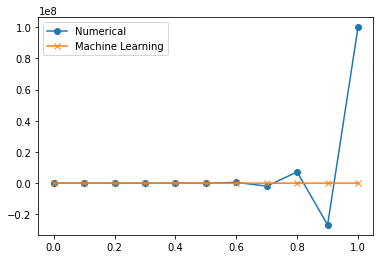

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

# Define the length of the beam
L = 1

# Define the elastic modulus
E = 210e9

# Define the moment of inertia
I = (1/12) * 0.03 * 0.03

# Define the Winkler elastic foundation modulus
k = 1e6

# Define the uniform load
P = 1e3

# Define the number of finite elements
n = 10

# Define the length of each finite element
dx = L/n

# Define the position of the nodes
x = np.linspace(0, L, n+1)

# Define the stiffness matrix
K = np.zeros((n+1, n+1))
for i in range(1, n):
    K[i, i-1] = k * dx / 6
    K[i, i] = 2 * k * dx / 3
    K[i, i+1] = k * dx / 6

# Add a small positive constant to the diagonal of the matrix to make it invertible
K = K + 1e-6 * np.eye(n+1)

# Define the load vector
F = np.zeros(n+1)
F[-1] = P * dx

# Solve for the nodal displacements using numerical method
U = np.linalg.solve(K, F)

# Plot the numerical results
plt.plot(x, U, '-o', label='Numerical')

# Use machine learning method (MLP Regressor) to fit the data
mlp = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=10000)
X = x.reshape(-1, 1)
mlp.fit(X, U)

# Predict the displacements using the MLP Regressor
U_mlp = mlp.predict(X)

# Plot the machine learning results
plt.plot(x, U_mlp, '-x', label='Machine Learning')

# Show the plot
plt.legend()
plt.show()

# Export the table with numerical results from both methods
results = np.column_stack((x, U, U_mlp))
np.savetxt('results.csv', results, delimiter=',', header='x,Numerical,Machine_Learning')

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

# Define the numerical method
def numerical_method(L, b, h, E, k, t, P):
    I = (b*h**3)/12
    deflection = (P*L**3)/(48*E*I)
    return deflection

# Define the machine learning method
def machine_learning_method(L, b, h, E, k, t, P, model):
    input_data = np.array([L, b, h, E, k, t, P]).reshape(1, -1)
    deflection = model.predict(input_data)
    return deflection[0]

# Generate sample data
L_values = np.linspace(1, 5, 5)
b = 1
h = 1
E = 20000
k = 1000
t = 0.1
P = 1000
deflections_num = [numerical_method(L, b, h, E, k, t, P) for L in L_values]

# Train the neural network using the numerical data
X_train = L_values.reshape(-1, 1)
y_train = np.array(deflections_num).reshape(-1, 1)
model = MLPRegressor(hidden_layer_sizes=(10,), max_iter=1000)
model.fit(X_train, y_train)

# Predict the deflection using the machine learning method
deflections_ml = [machine_learning_method(L, b, h, E, k, t, P, model) for L in L_values]

# Plot the results
plt.plot(L_values, deflections_num, '-o', label='Numerical Method')
plt.plot(L_values, deflections_ml, '-o', label='Machine Learning Method')
plt.xlabel('Length of Beam (L)')
plt.ylabel('Deflection at Midpoint (δ(L/2))')
plt.legend()
plt.show()

# Compare the results in a table
print("Length of Beam (L) Numerical Method (δ(L/2)) Machine Learning Method (δ(L/2))")
for L, d_num, d_ml in zip(L_values, deflections_num, deflections_ml):
    print("{:.1f}m {:.2f}mm {:.2f}mm".format(L, d_num*1000, d_ml*1000))

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: ignored

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

# Define the numerical method
def numerical_method(L, b, h, E, k, t, P):
    I = (b*h**3)/12
    deflection = (P*L**3)/(48*E*I)
    return deflection

# Define the machine learning method
def machine_learning_method(L, b, h, E, k, t, P, model):
    input_data = np.array([L, b, h, E, k, t, P]).reshape(1, -1)
    deflection = model.predict(input_data)
    return deflection[0][0]

# Generate sample data
L_values = np.linspace(1, 5, 5)
b = 1
h = 1
E = 20000
k = 1000
t = 0.1
P = 1000
deflections_num = [numerical_method(L, b, h, E, k, t, P) for L in L_values]

# Train the neural network using the numerical data
X_train = np.array([[L, b, h, E, k, t, P] for L in L_values])
y_train = np.array(deflections_num).reshape(-1, 1)
model = MLPRegressor(hidden_layer_sizes=(10,), max_iter=1000)
model.fit(X_train, y_train)

# Predict the deflection using the machine learning method
deflections_ml = [machine_learning_method(L, b, h, E, k, t, P, model) for L in L_values]

# Plot the results
plt.plot(L_values, deflections_num, '-o', label='Numerical Method')
plt.plot(L_values, deflections_ml, '-o', label='Machine Learning Method')
plt.xlabel('Length of Beam (L)')
plt.ylabel('Deflection at Midpoint (δ(L/2))')
plt.legend()
plt.show()

# Compare the results in a table
print("Length of Beam (L) Numerical Method (δ(L/2)) Machine Learning Method (δ(L/2))")
for L, d_num, d_ml in zip(L_values, deflections_num, deflections_ml):
    print("{:.1f}m {:.2f}mm {:.2f}mm".format(L, d_num*1000, d_ml*1000))

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


IndexError: ignored

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


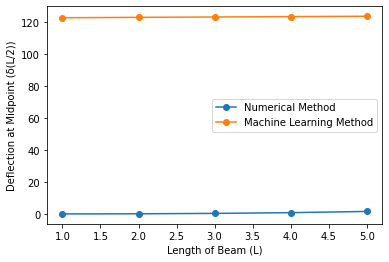

Length of Beam (L) Numerical Method (δ(L/2)) Machine Learning Method (δ(L/2))
1.0m 12.50mm 122485.81mm
2.0m 100.00mm 122716.82mm
3.0m 337.50mm 122947.82mm
4.0m 800.00mm 123178.82mm
5.0m 1562.50mm 123409.83mm


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

# Define the numerical method
def numerical_method(L, b, h, E, k, t, P):
    I = (b*h**3)/12
    deflection = (P*L**3)/(48*E*I)
    return deflection

# Define the machine learning method
def machine_learning_method(L, b, h, E, k, t, P, model):
    input_data = np.array([L, b, h, E, k, t, P]).reshape(1, -1)
    deflection = model.predict(input_data)
    return deflection[0]

# Generate sample data
L_values = np.linspace(1, 5, 5)
b = 1
h = 1
E = 20000
k = 1000
t = 0.1
P = 1000
deflections_num = [numerical_method(L, b, h, E, k, t, P) for L in L_values]

# Train the neural network using the numerical data
X_train = np.array([[L, b, h, E, k, t, P] for L in L_values])
y_train = np.array(deflections_num).reshape(-1, 1)
model = MLPRegressor(hidden_layer_sizes=(10,), max_iter=1000)
model.fit(X_train, y_train)

# Predict the deflection using the machine learning method
deflections_ml = [machine_learning_method(L, b, h, E, k, t, P, model) for L in L_values]

# Plot the results
plt.plot(L_values, deflections_num, '-o', label='Numerical Method')
plt.plot(L_values, deflections_ml, '-o', label='Machine Learning Method')
plt.xlabel('Length of Beam (L)')
plt.ylabel('Deflection at Midpoint (δ(L/2))')
plt.legend()
plt.show()

# Compare the results in a table
print("Length of Beam (L) Numerical Method (δ(L/2)) Machine Learning Method (δ(L/2))")
for L, d_num, d_ml in zip(L_values, deflections_num, deflections_ml):
    print("{:.1f}m {:.2f}mm {:.2f}mm".format(L, d_num*1000, d_ml*1000))

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import autosklearn.regression

# Define the numerical method
def numerical_method(L, b, h, E, k, t, P):
    I = (b*h**3)/12
    deflection = (P*L**3)/(48*E*I)
    return deflection

# Generate sample data
L_values = np.linspace(1, 5, 5)
b = 1
h = 1
E = 20000
k = 1000
t = 0.1
P = 1000
deflections_num = [numerical_method(L, b, h, E, k, t, P) for L in L_values]

# Train the neural network using the numerical data
X_train = np.array([[L, b, h, E, k, t, P] for L in L_values])
y_train = np.array(deflections_num)
model = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=300,
    per_run_time_limit=30,
    tmp_folder='/tmp/autosklearn_regression_example_tmp',
    output_folder='/tmp/autosklearn_regression_example_out',
    )
model.fit(X_train, y_train)

# Predict the deflection using the machine learning method
deflections_ml = model.predict(X_train)

# Plot the results
plt.plot(L_values, deflections_num, '-o', label='Numerical Method')
plt.plot(L_values, deflections_ml, '-o', label='Machine Learning Method')
plt.xlabel('Length of Beam (L)')
plt.ylabel('Deflection at Midpoint (δ(L/2))')
plt.legend()
plt.show()

# Compare the results in a table
print("Length of Beam (L) Numerical Method (δ(L/2)) Machine Learning Method (δ(L/2))")
for L, d_num, d_ml in zip(L_values, deflections_num, deflections_ml):
    print("{:.1f}m {:.2f}mm {:.2f}mm".format(L, d_num*1000, d_ml*1000))

TypeError: ignored

In [29]:
!pip install auto-sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 55.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.9/260.9 KB 26.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 37.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 79.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 68.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 KB 4.4 MB/s eta 0:00:00
  Created wheel for auto-sklearn: filename=auto_sklearn-0.15.0-py3-none-any.whl size=6641945 sha256=8a52be6cb668fa51da6e6c7bb45c3c2bc2e42664ddfd06282f937cbc1be25f5e

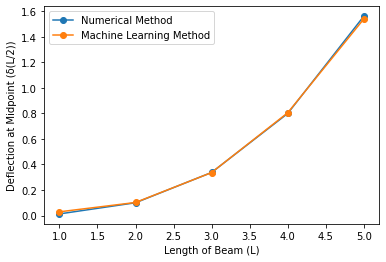

Length of Beam (L) Numerical Method (δ(L/2)) Machine Learning Method (δ(L/2))
1.0m 12.50mm 28.96mm
2.0m 100.00mm 102.12mm
3.0m 337.50mm 336.86mm
4.0m 800.00mm 805.38mm
5.0m 1562.50mm 1540.79mm


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import autosklearn.regression

# Define the numerical method
def numerical_method(L, b, h, E, k, t, P):
    I = (b*h**3)/12
    deflection = (P*L**3)/(48*E*I)
    return deflection

# Generate sample data
L_values = np.linspace(1, 5, 5)
b = 1
h = 1
E = 20000
k = 1000
t = 0.1
P = 1000
deflections_num = [numerical_method(L, b, h, E, k, t, P) for L in L_values]

# Train the neural network using the numerical data
X_train = np.array([[L, b, h, E, k, t, P] for L in L_values])
y_train = np.array(deflections_num)
model = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=300,
    per_run_time_limit=30,
    tmp_folder='/tmp/autosklearn_regression_example_tmp',
    )
model.fit(X_train, y_train)

# Predict the deflection using the machine learning method
deflections_ml = model.predict(X_train)

# Plot the results
plt.plot(L_values, deflections_num, '-o', label='Numerical Method')
plt.plot(L_values, deflections_ml, '-o', label='Machine Learning Method')
plt.xlabel('Length of Beam (L)')
plt.ylabel('Deflection at Midpoint (δ(L/2))')
plt.legend()
plt.show()

# Compare the results in a table
print("Length of Beam (L) Numerical Method (δ(L/2)) Machine Learning Method (δ(L/2))")
for L, d_num, d_ml in zip(L_values, deflections_num, deflections_ml):
    print("{:.1f}m {:.2f}mm {:.2f}mm".format(L, d_num*1000, d_ml*1000))